In [42]:
import pandas as pd

In [43]:
dolphins = pd.read_csv('outputs/dolphins_dataset.csv')

In [44]:
dolphins.head()

,Unnamed: 0,1,2,3,4,degree,betweenness,closeness,eigenvector,pagerank,...,lin,communicabilitybetweenness,katz,radiality,markov,laplacian,barycenter,bottleneck,entropy,crossclique
0,1,-0.053255,-0.071400,-0.071400,1,6,34.921151,0.005682,0.406936,0.016965,...,21.142045,305.327914,3.036264,6.262295,0.013881,130,0.005682,5,9.861475,13
1,2,0.071936,0.150004,0.278562,3,8,390.383717,0.006098,0.133244,0.024651,...,22.689024,1044.920267,3.020277,6.459016,0.014224,162,0.006098,57,9.861475,13
2,3,-0.071827,-0.053255,-0.053255,2,4,16.603247,0.004630,0.125900,0.013338,...,17.226852,62.308426,1.914140,5.606557,0.008501,56,0.004630,2,9.861475,6
3,4,-0.061022,-0.043327,-0.043327,2,3,4.344048,0.005051,0.251232,0.009629,...,18.792929,75.326126,2.110351,5.901639,0.007371,58,0.005051,0,9.861475,5
4,5,-0.061022,-0.058494,-0.061022,2,1,0.000000,0.004082,0.092745,0.005080,...,15.187755,9.273650,1.406011,5.131148,0.002666,22,0.004082,0,9.861475,2


In [45]:
dolphins.drop(['Unnamed: 0',"1","2","3"], axis=1, inplace=True)

In [46]:
# convert 4 to category
dolphins['4'] = dolphins['4'].astype('category')

In [47]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = dolphins['4']
X = dolphins.drop(['4'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# instantiate RandomForestClassifier
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train, y_train)

# import accuracy_score
from sklearn.metrics import accuracy_score

# predict on the test set
y_pred = rf.predict(X_test)

# evaluate the model
accuracy_score(y_test, y_pred)

0.38461538461538464

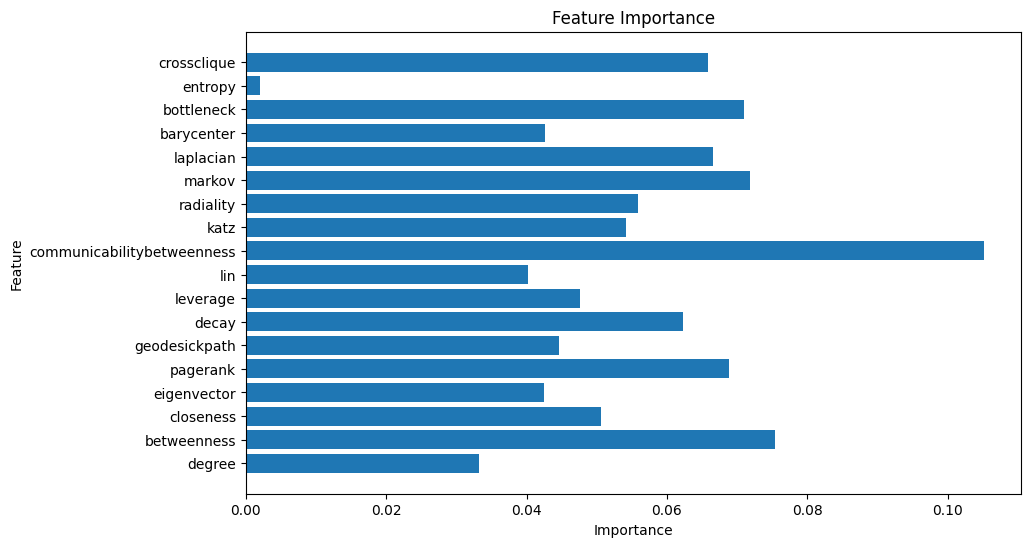

In [49]:
# feature importance
rf.feature_importances_

# import matplotlib
import matplotlib.pyplot as plt

# plot the feature importance and sort them in descending order
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [50]:
dolphins.dtypes

4                             category
degree                           int64
betweenness                    float64
closeness                      float64
eigenvector                    float64
pagerank                       float64
geodesickpath                    int64
decay                          float64
leverage                       float64
lin                            float64
communicabilitybetweenness     float64
katz                           float64
radiality                      float64
markov                         float64
laplacian                        int64
barycenter                     float64
bottleneck                       int64
entropy                        float64
crossclique                      int64
dtype: object

In [51]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

ExplainerDashboard(ClassifierExplainer(rf, X_test, y_test,labels=["mod_L","mod_R","mod_M"]), title="Dolphins", model_summary=True,hide_rocauc=True).run()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...


c:\Users\gaspa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.



ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.